<strong><font size="5"> EDA </font></strong> 



# 라이브러리 

## 라이브러리 설치
- 처음 수행 시 주석빼고 실행하기

In [23]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn

## 라이브러리 불러오기

In [3]:
import pandas as pd 
import numpy as np
import os 
import warnings

# 데이터프레임 옵션
pd.set_option('display.max_columns', 100) # 데이터프레임 출력 시 최대 열
pd.set_option('display.max_rows', 600) # 데이터프레임 출력 시 최대 행
pd.options.display.float_format = '{:.2f}'.format # 데이터프레임 출력 시 소수점 둘째자리까지 표시

# 경고 메시지 무시 설정
warnings.filterwarnings("ignore")

# 시각화 라이브러리
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 세부 옵션
plt.rcParams['font.size'] = 20
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

### 라이브러리 버전 확인

In [2]:
print( 'numpy Version : ' , np.__version__)
print( 'pandas Version : ' , pd.__version__)
print( 'matplotlib Version : ' , matplotlib.__version__)
print( 'seaborn Version : ' , sns.__version__)

numpy Version :  1.19.5
pandas Version :  1.3.3
matplotlib Version :  3.6.2
seaborn Version :  0.12.2


In [3]:
os.getcwd()

'/project/datacamp/team5/code'

## 데이터 불러오기
- 기간 : 2013년 1월 1일 ~ 2023년 6월 30일
- raw_data : 종목, 시가,고가,저가,종가,거래량,등락률, 거래대금, 시가총액이 포함된 데이터
- 종목 코드 변환 필요

In [4]:
data = pd.read_csv('../data/raw_data.csv')
data.head(5)

,Date,Code,Open,High,Low,Close,Volume,Change,Trading,captalization
0,2013-01-02,5930,30660,31519,30540,31520,11293461,3.55,355969894000,232143755112000
1,2013-01-03,5930,31640,31680,30860,30860,14358005,-2.09,443088034990,227282876991000
2,2013-01-04,5930,30800,30840,30199,30500,12959143,-1.17,395253861800,224631488925000
3,2013-01-07,5930,30300,30560,29999,30400,12565390,-0.33,381987869040,223894992240000
4,2013-01-08,5930,30260,30340,29960,30000,13873416,-1.32,416202501363,220949005500000


In [5]:
data.columns

Index(['Date', 'Code', 'Open', 'High', 'Low', 'Close', 'Volume', 'Change',
       'Trading', 'captalization'],
      dtype='object')

In [82]:
data.columns = ['date','code', 'Open', 'High', 'Low', 'Close', 'Volume', 'Change','Trading', 'captalization']

### 데이터 타입 확인

In [83]:
data.dtypes

date              object
code               int64
Open               int64
High               int64
Low                int64
Close              int64
Volume             int64
Change           float64
Trading            int64
captalization      int64
dtype: object

In [84]:
# 본래 종목코드 형식으로 변경 (ex. 5930 -> 005930) 
data['code'] = data['code'].apply(lambda x : str(x).zfill(6))

In [87]:
# 종목코드 개수 확인
data['code'].nunique()

139

In [90]:
# change 분포의 원활한 확인을 위해 100으로 나눠줌
data['Change'] = data['Change']/100

## 데이터 살펴보기
#### 기본 정보 확인

In [91]:
data.info() # 데이터프레임 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359176 entries, 0 to 359175
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date           359176 non-null  object 
 1   code           359176 non-null  object 
 2   Open           359176 non-null  int64  
 3   High           359176 non-null  int64  
 4   Low            359176 non-null  int64  
 5   Close          359176 non-null  int64  
 6   Volume         359176 non-null  int64  
 7   Change         359176 non-null  float64
 8   Trading        359176 non-null  int64  
 9   captalization  359176 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 27.4+ MB


## 통계값 확인
- count : raw 데이터에 결측값이 존재하지 않음.
- min : 주가와 거래량, 거래대금 열에 0값이 존재함 -> 개별 종목 확인 필요
- std : kospi200 종목 간의 가격 표준편차가 비교적 큼을 확인 -> 주가 분포 확인 필요
- change : 등락률은 [-0.3,0.3] 구간에서 존재함 -> 해당 종목 중 가격이 급변동하여 거래정지된 종목 X

In [107]:
data.describe() 

,Open,High,Low,Close,Volume,Change,Trading,captalization
count,359176.00,359176.00,359176.00,359176.00,359176.00,359176.00,359176.00,359176.00
mean,106543.30,108155.75,104941.24,106696.03,692252.63,0.00,30280200081.27,7876443393189.45
std,179173.96,181785.77,176640.03,179119.33,2190141.91,0.02,92928692990.80,26864419606418.76
min,0.00,0.00,0.00,895.00,0.00,-0.30,0.00,36008276820.00
25%,22550.00,22950.00,22200.00,22700.00,77799.00,-0.01,4015280650.00,1362504346500.00
50%,45600.00,46300.00,44947.00,45700.00,206445.50,0.00,10183023100.00,2721699545600.00
75%,105000.00,106500.00,103000.00,105000.00,571042.75,0.01,26161083437.50,6578745098800.00
max,1770000.00,1784000.00,1756000.00,1770000.00,175665905.00,0.30,8379237727064.00,543250212050000.00


## 데이터 주가 분포 확인
- 시가,고가,저가,종가의 분포는 비슷하게 나타나 종가의 분포만 시각화함<br>
- 139개 종목의 분포를 확인한 결과, 주가의 분포가 넓게 퍼져 있음
- 여러 종목의 주가를 직접 비교하기 어려우므로 스케일링을 통해 주가 데이터를 일정 범위로 변환 필요

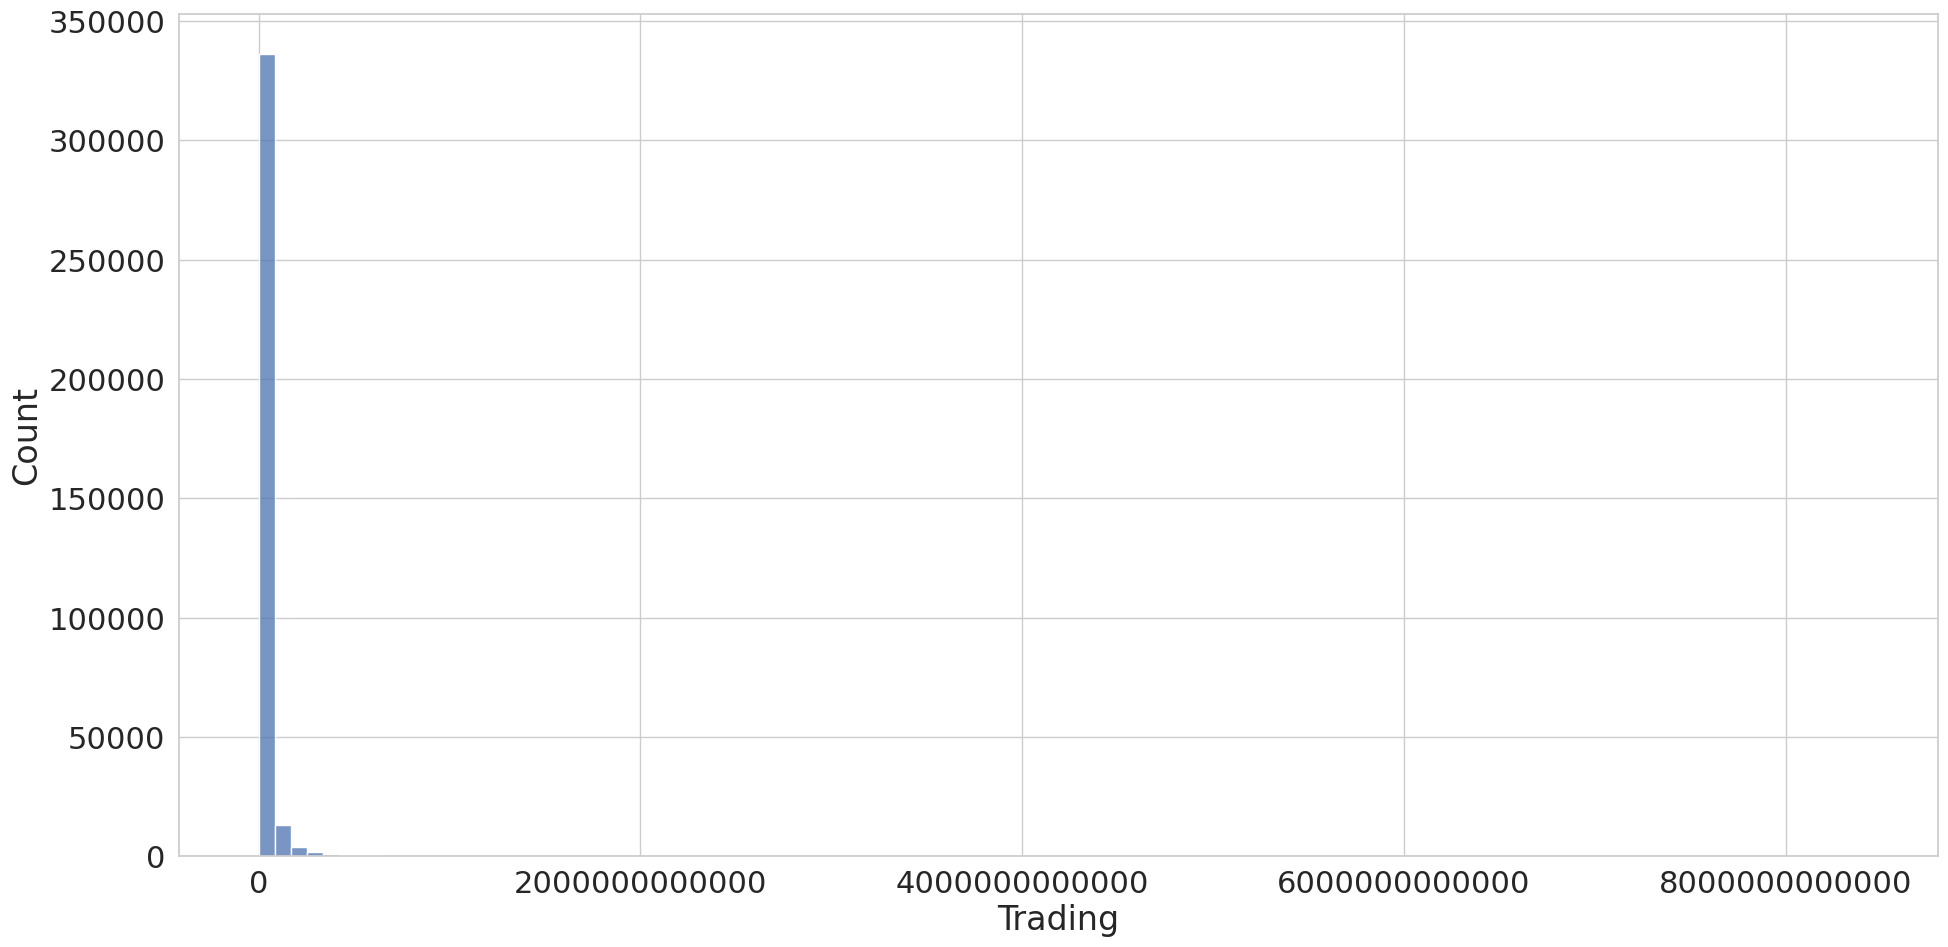

In [6]:
# Seaborn 스타일 설정과 폰트 크기 지정
sns.set(style="whitegrid", font_scale = 2)  # 폰트 크기를 2로 지정

sns.histplot(data['Trading'], bins = 100)

plt.ticklabel_format(style='plain')   # 숫자를 지수형식이 아닌 일반적인 형식으로 표시

plt.tight_layout()
plt.show()

### 스케일링 전 주가 분포
#### Kopsi200 종가 분포

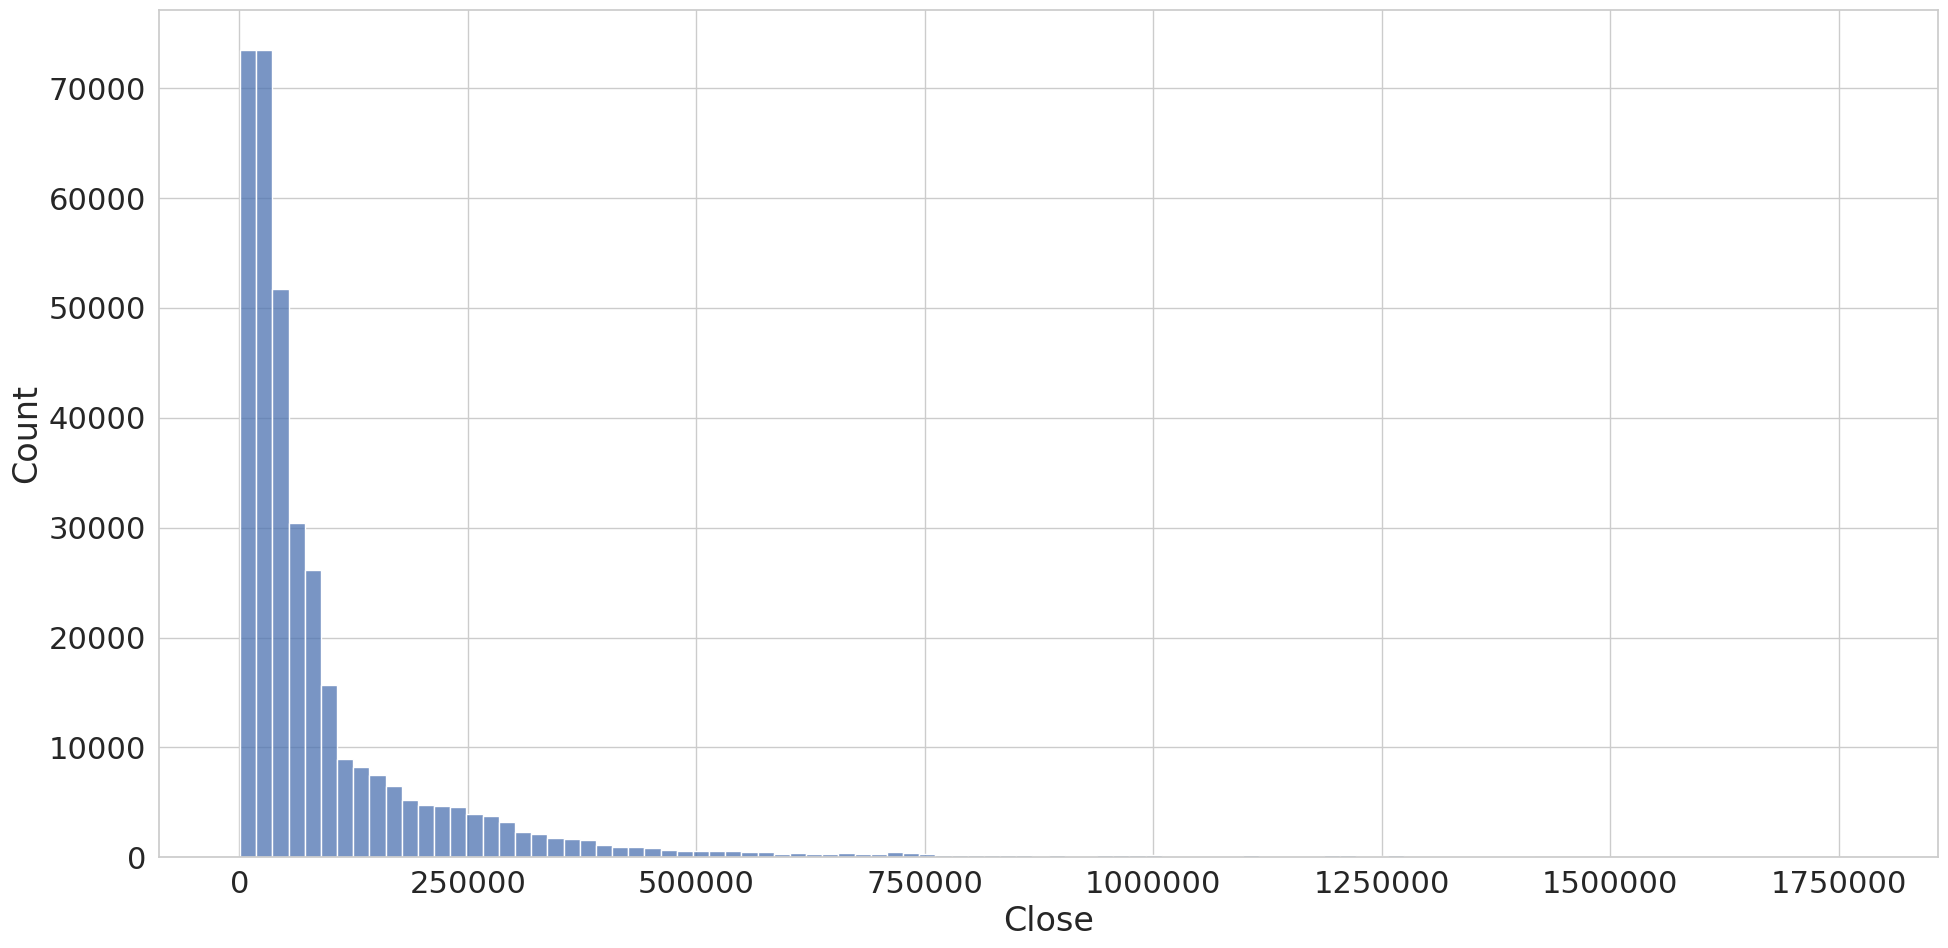

In [108]:
# Seaborn 스타일 설정과 폰트 크기 지정
sns.set(style="whitegrid", font_scale = 2)  # 폰트 크기를 2로 지정

sns.histplot(data['Close'], bins = 100)

plt.ticklabel_format(style='plain')   # 숫자를 지수형식이 아닌 일반적인 형식으로 표시

plt.tight_layout()
plt.show()

### 세 개의 종목의 종가 분포 확인

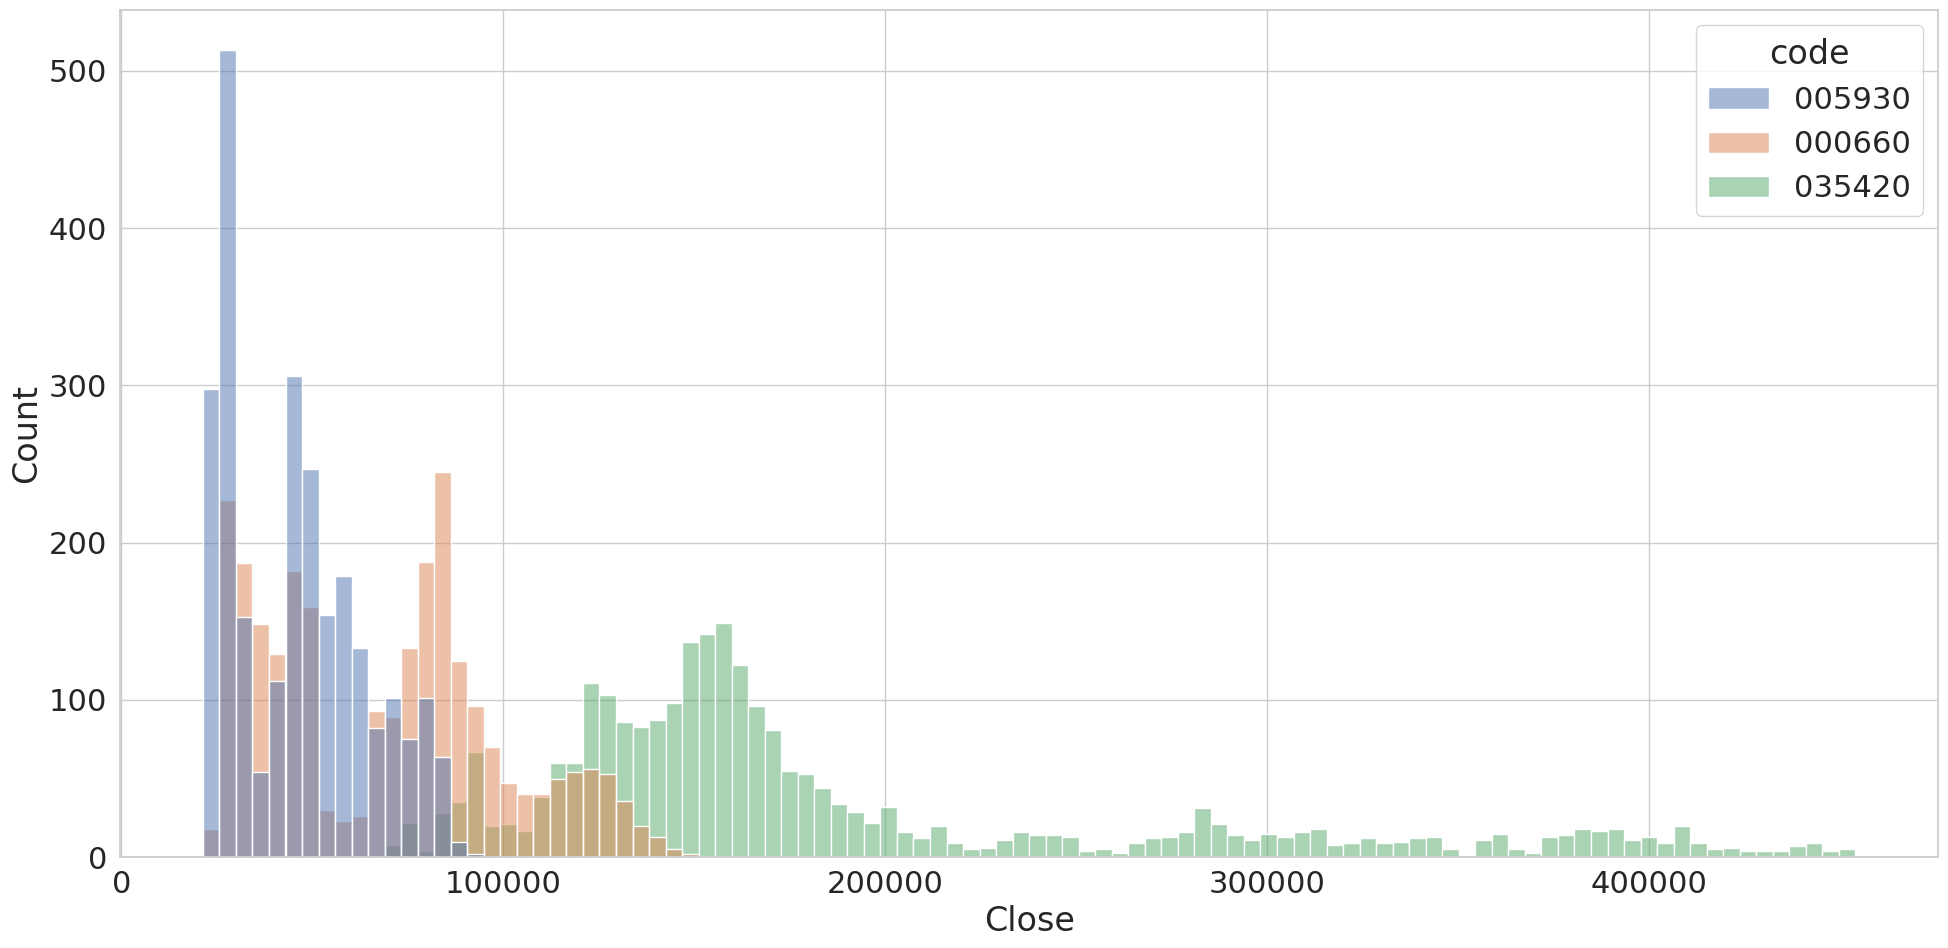

In [109]:
# Seaborn 스타일 설정과 폰트 크기 지정
sns.set(style="whitegrid", font_scale = 2)  # 폰트 크기를 2로 지정

selected_codes = ['005930', '000660', '035420']  # 원하는 코드 리스트
filtered_df = data[data['code'].isin(selected_codes)]
sns.histplot(data=filtered_df, x = 'Close', hue='code', bins=100)

plt.ticklabel_format(style='plain')   # 숫자를 지수형식이 아닌 일반적인 형식으로 표시

plt.tight_layout()
plt.show()

### 스케일링 후 주가 분포

In [5]:
df_scale = pd.read_csv('../data/scale_all_data_modify.csv')
df_scale.head(5)

,code,date,Open,High,Low,Close,Trading,capitalization,MA5,MA20,MA60,MA120,VMAP,KCH,KCL,KCM,DCH,DCL,DCM,SMA,EMA,WMA,Ichimoku,KAMA,MACD,MFI,ADI,OBV,CMF,FI,EOM,EMV,VPT,NVI,ATR,UI,ADX,-VI,+VI,TRIX,MI,CCI,DPO,KST,STC,RSI,SRSI,TSI,UO,SR,WR,AO,ROC,PPO,PVO,BHB,BLB,weekly_Open,weekly_High,weekly_Low,weekly_Close,weelky_Trading,W_MA5,W_MA10,W_MA20,monthly_Open,monthly_High,monthly_Low,monthly_Close,monthly_Trading,M_MA5,M_MA10,M_MA20,next_change
0,5930,2013-01-02,0.70,0.71,0.69,0.71,16.27,22.75,0.69,0.68,0.65,0.63,0.69,0.69,0.67,0.68,0.71,0.65,0.69,0.00,0.69,0.69,0.69,0.02,0.00,73.35,209988616.77,228030116,0.09,1983099725.68,7450776.16,7450776.16,584473.13,1436.49,681.24,0.80,1.12,0.34,26.88,178.52,139.00,89.07,29914.25,21.54,69.22,0.75,25.72,54.84,100.04,0.04,1223.89,23105.42,6.78,2.30,-0.80,1.03,0.92,0.70,0.71,0.69,0.71,16.27,0.68,0.65,0.63,0.70,0.71,0.69,0.71,16.27,0.63,0.62,0.55,-0.02
1,5930,2013-01-03,0.70,0.70,0.68,0.68,16.46,22.70,0.68,0.67,0.63,0.61,0.67,0.68,0.65,0.67,0.70,0.64,0.67,0.00,0.67,0.67,0.67,0.02,0.00,66.48,195630611.77,213672111,0.07,346045007.73,1373519.51,1373519.51,100044.34,1436.49,691.15,0.82,1.09,0.34,26.90,156.48,862.00,87.21,30019.75,45.76,62.18,0.48,25.47,50.92,71.54,-28.46,1509.83,23137.70,3.56,2.36,-0.74,0.99,0.90,0.68,0.70,0.68,0.68,17.05,0.66,0.64,0.62,0.68,0.70,0.68,0.68,17.05,0.62,0.60,0.54,-0.01
2,5930,2013-01-04,0.69,0.69,0.68,0.69,16.37,22.71,0.69,0.68,0.64,0.62,0.68,0.69,0.67,0.68,0.71,0.65,0.68,0.00,0.68,0.68,0.69,0.02,0.00,66.28,194842145.97,200712968,0.05,-369860204.80,-3712209.21,-3712209.21,-451819.51,1419.74,689.00,0.88,1.05,0.34,26.75,76.96,407.00,83.96,30019.75,65.33,58.67,0.34,24.05,57.15,59.04,-40.96,1556.86,23168.35,-0.52,2.28,-1.46,1.01,0.92,0.69,0.71,0.68,0.69,17.47,0.67,0.65,0.63,0.69,0.71,0.68,0.69,17.47,0.63,0.61,0.55,-0.00
3,5930,2013-01-07,0.69,0.69,0.68,0.69,16.34,22.72,0.70,0.68,0.65,0.63,0.69,0.70,0.67,0.68,0.71,0.66,0.69,0.00,0.69,0.69,0.69,0.02,0.00,59.79,200240112.08,188147578,0.05,-496528604.12,-1071514.69,-1071514.69,-192374.00,1415.08,679.85,0.91,1.03,0.34,26.61,46.65,77.00,80.55,30019.75,75.75,57.70,0.30,22.63,55.21,55.57,-44.43,1577.19,23198.45,0.33,2.16,-2.25,1.03,0.94,0.69,0.69,0.68,0.69,16.34,0.68,0.66,0.64,0.70,0.71,0.68,0.69,17.76,0.64,0.62,0.55,-0.01
4,5930,2013-01-08,0.69,0.69,0.69,0.69,16.43,22.71,0.70,0.69,0.65,0.63,0.69,0.70,0.68,0.69,0.71,0.66,0.69,0.00,0.69,0.69,0.69,0.02,0.00,48.91,189287415.24,174274162,-0.02,-1218362574.96,-354707.16,-354707.16,-223742.95,1415.08,662.72,1.00,0.98,0.33,26.34,11.10,272.00,75.98,30030.00,75.52,53.85,0.20,20.21,55.10,41.69,-58.31,1469.94,23226.76,-0.20,1.94,-2.10,1.03,0.95,0.69,0.70,0.69,0.69,17.08,0.68,0.66,0.64,0.70,0.71,0.69,0.69,18.00,0.64,0.62,0.55,0.00


In [8]:
df_scale.describe()

,code,Open,High,Low,Close,Trading,capitalization,MA5,MA20,MA60,MA120,VMAP,KCH,KCL,KCM,DCH,DCL,DCM,SMA,EMA,WMA,Ichimoku,KAMA,MACD,MFI,ADI,OBV,CMF,FI,EOM,EMV,VPT,NVI,ATR,UI,ADX,-VI,+VI,TRIX,MI,CCI,DPO,KST,STC,RSI,SRSI,TSI,UO,SR,WR,AO,ROC,PPO,PVO,BHB,BLB,weekly_Open,weekly_High,weekly_Low,weekly_Close,weelky_Trading,W_MA5,W_MA10,W_MA20,monthly_Open,monthly_High,monthly_Low,monthly_Close,monthly_Trading,M_MA5,M_MA10,M_MA20,next_change
count,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00,357684.00
mean,27007.46,0.69,0.70,0.69,0.69,12.22,17.94,0.69,0.69,0.70,0.70,0.69,0.71,0.68,0.69,0.73,0.66,0.69,0.00,0.69,0.69,0.69,-0.00,0.00,50.75,-36125630.51,67661448.34,-0.03,95733857.83,11394172235.48,11394172235.48,9822.21,747.05,3371.31,0.97,0.96,0.00,24.95,-2.02,2.67,7.28,107271.33,50.27,49.57,0.49,-0.72,48.68,47.66,-52.34,13.49,106009.72,0.38,-0.04,-1.70,1.08,0.93,0.69,0.71,0.68,0.69,13.17,0.69,0.70,0.70,0.69,0.72,0.67,0.69,14.46,0.70,0.70,0.71,0.00
std,31978.31,0.01,0.01,0.01,0.01,1.61,1.31,0.01,0.03,0.05,0.07,0.02,0.03,0.03,0.03,0.04,0.03,0.02,0.00,0.02,0.02,0.01,0.03,0.00,17.82,115750997.63,168255892.80,0.18,1521501285.80,11986242762525.18,11986242762525.18,311622.66,678.14,5655.62,0.16,0.16,0.38,1.23,112.56,5867.61,97.91,179754.69,43.47,11.86,0.36,20.19,10.24,29.74,29.74,12202.71,175264.42,8.72,2.71,13.18,0.08,0.07,0.02,0.01,0.01,0.01,1.70,0.03,0.05,0.07,0.04,0.03,0.03,0.01,1.77,0.07,0.09,0.14,0.02
min,80.00,0.53,0.57,0.53,0.53,4.38,12.50,0.55,0.35,0.24,0.16,0.39,0.41,0.29,0.35,0.69,0.20,0.54,0.00,0.43,0.47,0.53,-1.01,0.00,0.00,-1373072841.59,-270992773.00,-0.95,-59901369842.28,-2492626404494382.00,-2492626404494382.00,-20203463.61,0.41,21.31,0.29,0.32,-3.42,18.46,-634.05,-149550.00,-615.91,966.50,0.00,4.49,0.00,-84.44,11.81,0.00,-100.00,-246517.65,923.30,-60.51,-31.72,-63.26,0.84,-0.02,0.47,0.61,0.45,0.53,4.38,0.33,0.25,0.18,0.22,0.66,0.21,0.53,4.74,0.18,0.12,0.09,-0.30
25%,4490.00,0.69,0.70,0.68,0.69,11.28,17.18,0.69,0.68,0.67,0.66,0.68,0.69,0.66,0.68,0.71,0.64,0.68,0.00,0.68,0.69,0.69,-0.02,0.00,37.64,-24272541.11,5582597.25,-0.15,-39793444.93,-257919213.43,-257919213.43,-3629.31,296.69,686.47,0.86,0.85,-0.20,24.17,-88.95,-747.50,-46.99,22984.25,1.26,41.46,0.14,-14.60,41.56,20.63,-79.37,-1647.52,23618.35,-4.38,-1.48,-9.60,1.03,0.91,0.69,0.70,0.68,0.69,12.15,0.68,0.67,0.66,0.68,0.70,0.66,0.69,13.42,0.66,0.65,0.63,-0.01
50%,11170.00,0.69,0.70,0.69,0.69,12.24,17.88,0.69,0.69,0.70,0.70,0.69,0.71,0.68,0.69,0.72,0.66,0.69,0.00,0.69,0.69,0.69,-0.00,0.00,50.96,-3637730.89,17730244.00,-0.03,1912713.15,-25194.37,-25194.37,-21.64,611.56,1415.87,0.98,0.97,-0.01,24.90,-6.87,-0.05,-0.93,45937.50,50.00,49.28,0.48,-1.12,48.64,46.77,-53.23,-52.06,45689.47,-0.19,-0.11,-2.63,1.05,0.95,0.69,0.70,0.68,0.69,13.22,0.69,0.70,0.70,0.69,0.71,0.67,0.69,14.54,0.70,0.70,0.70,0.00
75%,36460.00,0.70,0.70,0.69,0.70,13.26,18.64,0.70,0.71,0.72,0.74,0.71,0.72,0.69,0.71,0.75,0.68,0.70,0.00,0.70,0.70,0.70,0.01,0.00,63.93,2546728.38,52647886.25,0.10,73531383.55,190176849.66,190176849.66,3753.15,965.14,3575.29,1.09,1.07,0.20,25.65,83.32,737.50,51.79,105325.00,98.93,57.60,0.83,12.99,55.73,74.14,-25.86,1535.59,105026.45,4.43,1.38,5.00,1.10,0.97,0.70,0.71,0.69,0.70,14.26,0.71,0.72,0.73,0.71,0.73,0.68,0.70,15.61,0.73,0.75,0.78,0.01
max,128940.00,0.83,0.83,0.83,0.83,19.13,22.80,0.93,1.13,1.57,1.65,0.95,1.23,1.06,1.1

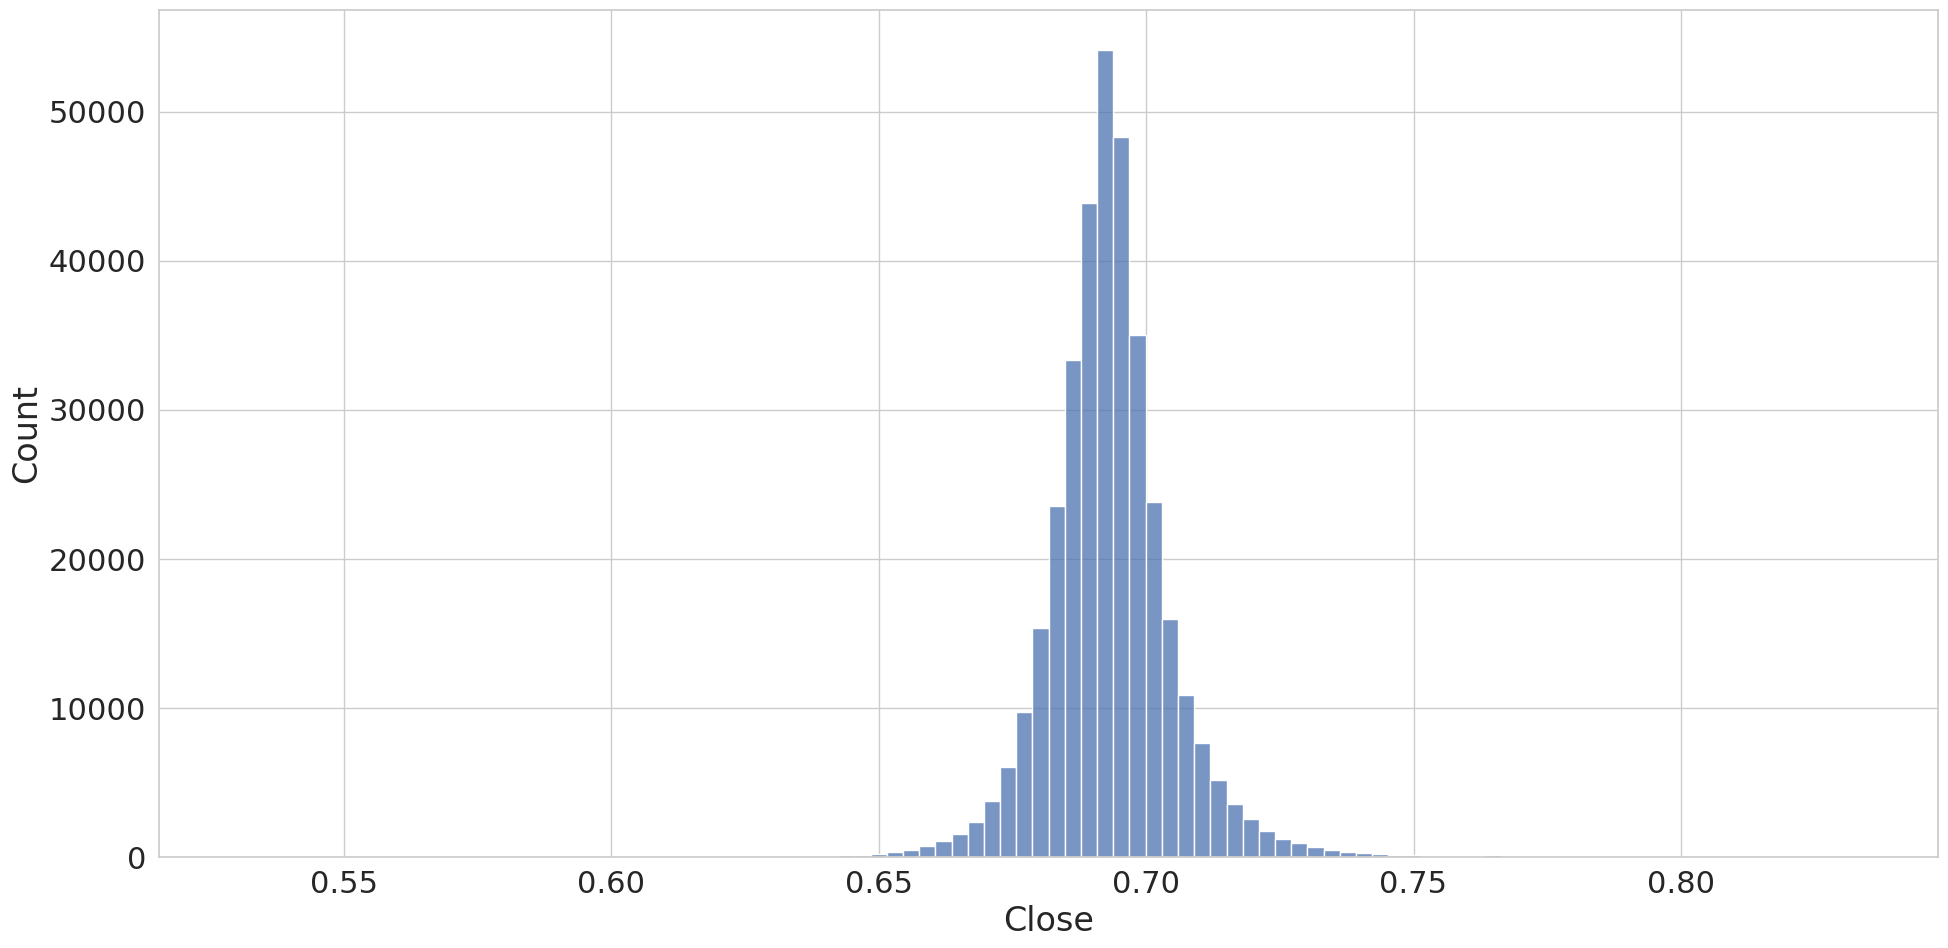

In [7]:
# Seaborn 스타일 설정과 폰트 크기 지정
sns.set(style="whitegrid", font_scale = 2)  # 폰트 크기를 2로 지정

sns.histplot(df_scale['Close'], bins = 100)

plt.ticklabel_format(style='plain')   # 숫자를 지수형식이 아닌 일반적인 형식으로 표시

plt.tight_layout()
plt.show()

## 다음날 종가상승률 분포 확인
- 정규분포에 비해 데이터의 분포가 상대적으로 좁게 나타남

#### 임계값 설정 방법
- 방법 1 : 통계적 방법(평균,표준편차)을 사용한 임계값 설정
- 방법 2 : 히스토그램의 분포(막대가 급격하게 떨어지는 지점)를 확인한 후 임계값 설정

### 다음 날 등락률 추출
- raw data에는 다음 날 등락률이 추출되지 않으므로 day_data에서 뽑아옴

In [128]:
df_day = pd.read_csv('../data/data_raw_index.csv')
df_nc = df_day[['next_change']]

mean : 0.0, std : 0.025


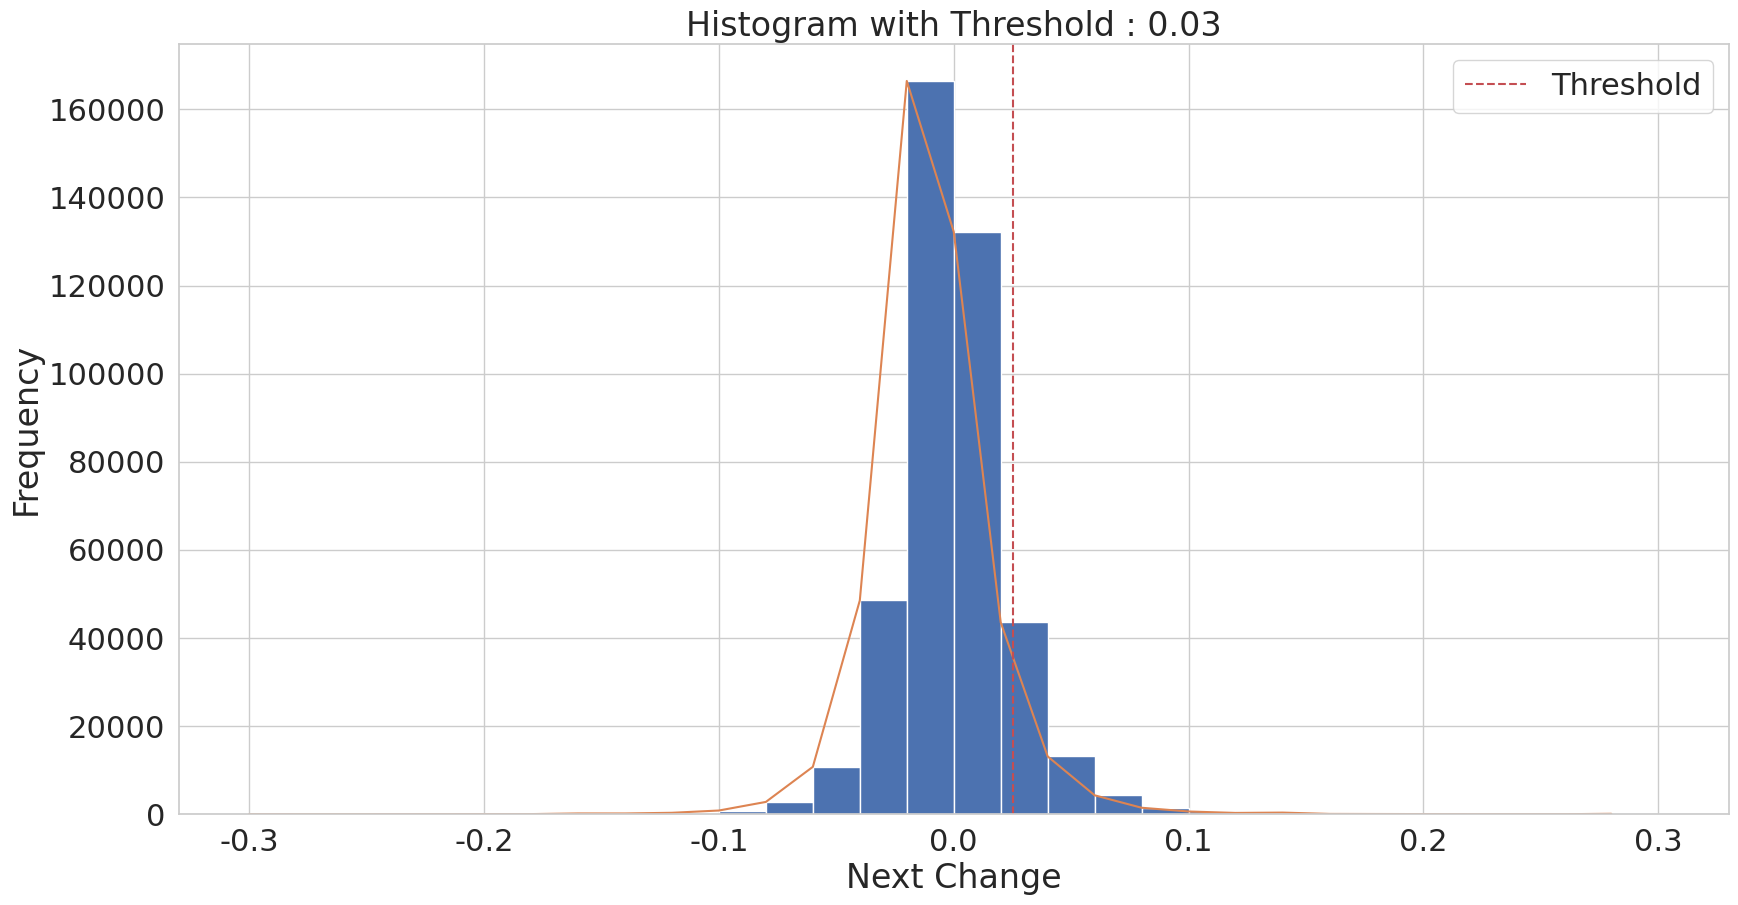

In [129]:
import matplotlib.pyplot as plt
n, bins, _ = plt.hist(df_nc['next_change'], bins=30)

mean = np.mean(df_nc['next_change']) # 다음날 등락률 평균
std = np.std(df_nc['next_change']) # 다음날 등락률 표준편차
print(f'mean : {round(mean,3)}, std : {round(std,3)}')
    
# 임계값 설정 (평균 + 표준편차)
threshold = mean + std

plt.plot(bins[:-1], n)

# 임계값 표시
plt.axvline(x=threshold, color='r', linestyle='--', label='Threshold')

plt.xlabel('Next Change')
plt.ylabel('Frequency')
plt.title(f"Histogram with Threshold : {round(threshold,2)}")
plt.legend()

plt.show()

## target 분포 확인
- 임계값에 따라 라벨 분류하는 함수 생성

In [172]:
# 임계값에 따라 라벨 분류하는 함수
def make_label(next_change, label):
    if next_change >= label:
        return 1
    else:
        return 0
    
# .loc[]를 사용하여 값을 할당하는 방식
df_nc.loc[:, 'label_0.02'] = df_nc['next_change'].apply(lambda x: make_label(x, 0.02))
df_nc.loc[:, 'label_0.03'] = df_nc['next_change'].apply(lambda x: make_label(x, 0.03))
df_nc.loc[:, 'label_0.05'] = df_nc['next_change'].apply(lambda x: make_label(x, 0.05))

In [173]:
df_nc

,next_change,label_0.02,label_0.03,label_0.05
0,0.00,0,0,0
1,-0.02,0,0,0
2,-0.01,0,0,0
3,-0.01,0,0,0
4,-0.00,0,0,0
...,...,...,...,...
426495,0.01,0,0,0
426496,0.00,0,0,0
426497,-0.02,0,0,0
426498,0.01,0,0,0


### 임계값에 따른 target 분포
- 라벨 0.03 또는 0.05의 경우 : 라벨의 분포가 불균형하여 모델링 시 가중치 조정 고려해야 함

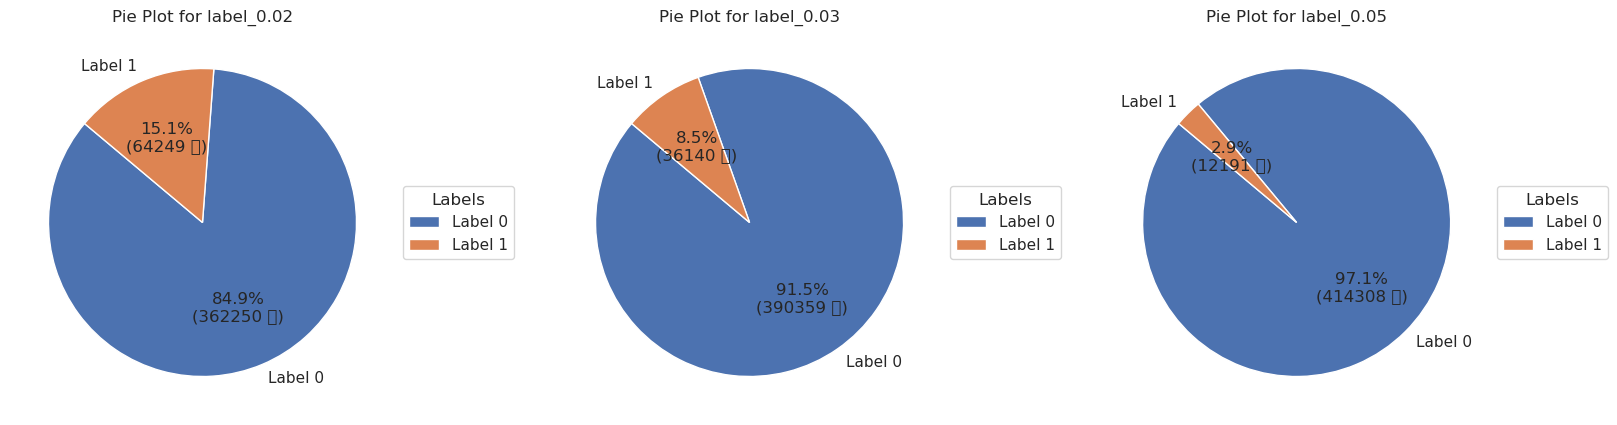

In [179]:
# Seaborn 스타일 설정
sns.set(style="whitegrid")

# 서브플롯 생성 (1x3 배치)
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# 각 label에 해당하는 데이터 프레임 생성
labels = ['label_0.02', 'label_0.03', 'label_0.05']

for i, ax in enumerate(axes):
    
    # 데이터 프레임의 'label' 열에서 0과 1의 개수 세기
    value_counts = df_nc[labels[i]].value_counts()
    count_0 = value_counts[0]
    count_1 = value_counts[1]
    sizes = [count_0, count_1]

    # 비율과 개수를 함께 표시하는 형식 지정
    def func(pct, allvalues):
        absolute = int(pct/100.*np.sum(allvalues))
        return f"{pct:.1f}%\n({absolute:d} 개)"
    
    
    # 원 그래프 그리기
    wedges, texts, autotexts = ax.pie(sizes, labels=['Label 0', 'Label 1'], autopct=lambda pct: func(pct, sizes), startangle=140)
    ax.set_title(f"Pie Plot for {labels[i]}")
    ax.legend(wedges, ['Label 0', 'Label 1'], title="Labels", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


plt.show()

## 삼성전자 주가 시각화
- 2018년 2월 1일 ~ 2018년 6월 30일까지 시각화
- 종가를 제외한 가격정보가 0으로 나타남 
- 기존의 1주를 50주로 쪼개는 액면분할을 실시하여 4.30 ~ 5.2일까지 거래정지기간으로 나타남<br>
- 거래 정지 기간동안 종가를 제외한 값이 0으로 나타나는 것은 예측에 어려움이 될 것이라 판단함<br>

<strong>[시각화 이후 전처리]</strong>
- 거래 정지 기간동안 0으로 나타나는 데이터는 삭제<br>
- 거래 정지 기간의 데이터를 삭제함으로써, 예측에 불필요한 왜곡을 방지하는데 도움이 될 것이라 판단함<br>

In [181]:
df_samsung = data[data['code'] == '005930']
df_samsung

,date,code,Open,High,Low,Close,Volume,Change,Trading,captalization
0,2013-01-02,005930,30660,31519,30540,31520,11293461,0.04,355969894000,232143755112000
1,2013-01-03,005930,31640,31680,30860,30860,14358005,-0.02,443088034990,227282876991000
2,2013-01-04,005930,30800,30840,30199,30500,12959143,-0.01,395253861800,224631488925000
3,2013-01-07,005930,30300,30560,29999,30400,12565390,-0.00,381987869040,223894992240000
4,2013-01-08,005930,30260,30340,29960,30000,13873416,-0.01,416202501363,220949005500000
...,...,...,...,...,...,...,...,...,...,...
2579,2023-06-26,005930,71700,72500,71500,72400,10518306,0.01,761525382100,432212256620000
2580,2023-06-27,005930,72500,72600,72000,72600,9416318,0.00,683624715982,433406213130000
2581,2023-06-28,005930,72600,72700,72000,72700,8741632,0.00,635516679700,434003191385000
2582,2023-06-29,005930,73100,73400,72400,72400,12316731,-0.00,891731369446,432212256620000


In [186]:
df_samsung.describe()

,Open,High,Low,Close,Volume,Change,Trading,captalization
count,2584.00,2584.00,2584.00,2584.00,2584.00,2584.00,2584.00,2584.00
mean,45840.70,46260.43,45399.61,45881.53,13968379.72,0.00,676885830482.98,292809559350223.88
std,17945.86,18084.80,17792.32,17855.83,7103971.77,0.02,536973535203.79,92855958909459.67
min,0.00,0.00,0.00,21340.00,0.00,-0.08,0.00,157168392579000.00
25%,28330.00,28600.00,28095.00,28395.00,9534612.25,-0.01,323624718675.00,207692065170000.00
50%,45745.00,46170.00,45245.00,45700.00,12250843.50,0.00,504194499063.00,286943814090000.00
75%,58700.00,59300.00,58100.00,58725.00,16143351.00,0.01,877824167425.00,353411126960000.00
max,90300.00,96800.00,89500.00,91000.00,92079535.00,0.10,8379237727064.00,543250212050000.00


### 삼성전자 거래정지 시각화

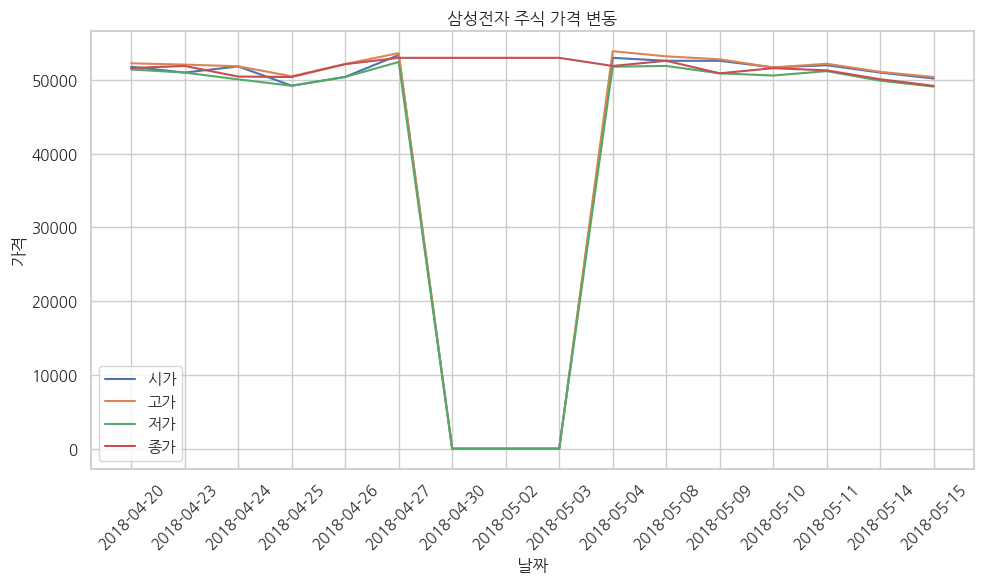

In [200]:
# Seaborn 스타일 설정
sns.set(style="whitegrid")

# 한글 폰트 설정
plt.rcParams["font.family"] = 'NanumGothic'

# 주식 데이터에서 필요한 열 추출
selected_columns = ['date','Open','High','Low','Close']
subset_data = df_samsung[selected_columns]

# 거래정지기간 주가 뽑기
subset_data = subset_data[(subset_data['date'] >= '2018-04-20') & ( subset_data['date'] <= '2018-05-15' )]

# 날짜를 x축으로 하여 라인 플롯 그리기
plt.figure(figsize=(10, 6))
sns.lineplot(data=subset_data, x='date', y='Open', label='시가')
sns.lineplot(data=subset_data, x='date', y='High', label='고가')
sns.lineplot(data=subset_data, x='date', y='Low', label='저가')
sns.lineplot(data=subset_data, x='date', y='Close', label='종가')

plt.xlabel('날짜')
plt.ylabel('가격')

plt.title('삼성전자 주식 가격 변동')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### 종가와 시가총액의 관계
- 종가와 시가총액이 비슷하게 움직임을 확인함
- 주식 가격의 상승이 기업의 가치 증가와 관련 있다고 판단함

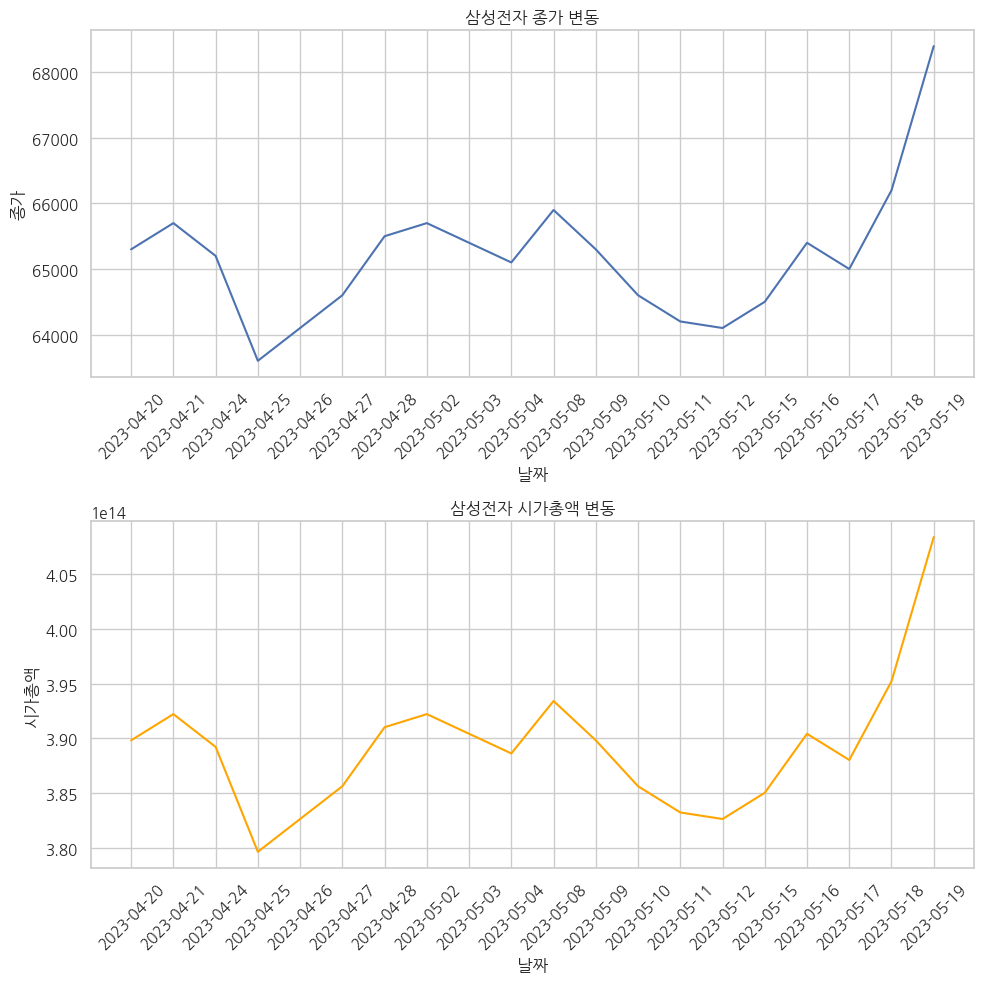

In [213]:
# 서브플롯 생성 (2x1 배치)
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Seaborn 스타일 설정
sns.set(style="whitegrid")

# 한글 폰트 설정
plt.rcParams["font.family"] = 'NanumGothic'

# 주식 데이터에서 필요한 열 추출
selected_columns = ['date','Close','captalization']
subset_data = df_samsung[selected_columns]

subset_data = subset_data[(subset_data['date'] >= '2023-04-20') & ( subset_data['date'] <= '2023-05-20' )]

# 종가 그리기
sns.lineplot(data=subset_data, x='date', y='Close', ax=axes[0])
axes[0].set_xlabel('날짜')
axes[0].set_ylabel('종가')
axes[0].set_title('삼성전자 종가 변동')
axes[0].tick_params(axis='x', rotation=45) 



# 시가총액 그리기
sns.lineplot(data=subset_data, x='date', y='captalization', ax=axes[1], color='orange')
axes[1].set_xlabel('날짜')
axes[1].set_ylabel('시가총액')
axes[1].set_title('삼성전자 시가총액 변동')
axes[1].tick_params(axis='x', rotation=45) 


plt.tight_layout()
plt.show()

In [ ]:
# 